# `Heart Prediction Disease UCI dataset`

Author: Ammar Ahmed

Email: ammar07ahmed08@gmail.com

Contact: [LinkedIn](https://www.linkedin.com/in/ammar-ahmed-1a719628a/)

# `Goal of the Analysis`

1. `Data Preparation:`

    `Cleaning and Preprocessing:` 
    Ensure the dataset is free of inconsistencies, missing values, and outliers to improve model accuracy.

    `Feature Engineering:`
    Transform or create features to enhance model performance.

    `Data Splitting:` 
    Divide the dataset into training and testing sets for model validation.

2. `Exploratory Data Analysis (EDA):`
    Gain insights into the data, understanding relationships and distributions that might influence model selection and performance.

3. `Model Training:`
    Selection of Models: Choose a diverse set of models to compare. This might include decision trees, random forest and XGboost


4. `Model Evaluation and Comparison:`

    `Evaluation Metrics:` 
    Utilize metrics such as accuracy, precision, recall, F1-score,to assess each model's performance.

5. `Predictive Performance:`
    Determine which model performs best on the test data based on the chosen evaluation metrics.

6.  `Insights and Conclusion:`
    Draw conclusions from the model comparisons and provide insights into which models are most effective for predicting heart disease in this specific dataset.


# Models to be trained

I will be training the following models on the dataset:

1. Decision Tree
2. Random Forest
3. XGBoost


# Evaluation Metrics:

The performance of these models will be assessed using the following metrics, which are crucial for determining their effectiveness in a clinical setting:

1. Accuracy Score
2. Precision Score
3. Recall Score
4. F1 Score


# `About the Dataset`

The UCI Heart Disease dataset comprises a series of attributes designed to forecast the likelihood of heart disease in individuals. Each record in this dataset corresponds to a distinct patient, with the columns detailing diverse health-related characteristics and the presence or absence of heart disease.

### `Attribute Information:`

1. id: (Unique id for each patient)

2. age: (Age of the patient in years)
   
3. origin: (place of study)
   
4. sex: (Male/Female)
   
5. cp: chest pain type includes:
      - typical angina
      -  atypical angina
      -  non-anginal
      -  asymptomatic

6. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

7. chol: Serum Cholesterol in mg/dl
   
8.  fbs: if fasting blood sugar > 120 mg/dl
   
9.  restecg: resting electrocardiographic results -- Values include:
       - normal
       - stt abnormality
       - lv hypertrophy
    
10. thalach: maximum heart rate achieved
    
11. exang: exercise-induced angina (True/ False)
    
12. oldpeak: ST depression induced by exercise relative to rest
    
13. slope: the slope of the peak exercise ST segment
    
14. ca: number of major vessels (0-3) colored by fluoroscopy
    
15. thal: Thalassemia Categories includes
       - normal
       - fixed defect 
       - reversible defect
    
16. num: the predicted attribute diagnosis of heart disease 

# `Importing Libraries`


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier

# import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,mean_absolute_error, mean_squared_error, r2_score


# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# import warnings
import warnings
warnings.filterwarnings('ignore')


# `Read the Data `

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

## `Data Overview`

- Inspecting the dimensions of the dataset

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.shape
print(f"There are {df.shape[0]} patients and {df.shape[1]} features in the dataset.")

There are 920 patients and 16 features in the dataset.


In [5]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### Statistical Summary of the Dataset

In [7]:
# Generating a statistical summary of the dataset
statistical_summary = df.describe()
statistical_summary

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


---

    Observations:

- The dataset consists of 920 entries, indicating there are 920 patient's records.
- There are 16 columns in total.
- These columns are a mix of numerical (int64 and float64) and categorical (object) data types.
- There are missing values in the dataset, as indicated by the non-null values in each column which we will deal later after exploring different columns just to get a better understanding of the dataset.

--- 

# 1. `Exploring Different Columns:` 

# - Target Column

First, let's explore our target variable, num, which indicates whether or not a patient has heart disease.

In [8]:
num = df['num'].value_counts()
print(num)

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


Text(0.5, 1.0, 'Heart Disease Frequency')

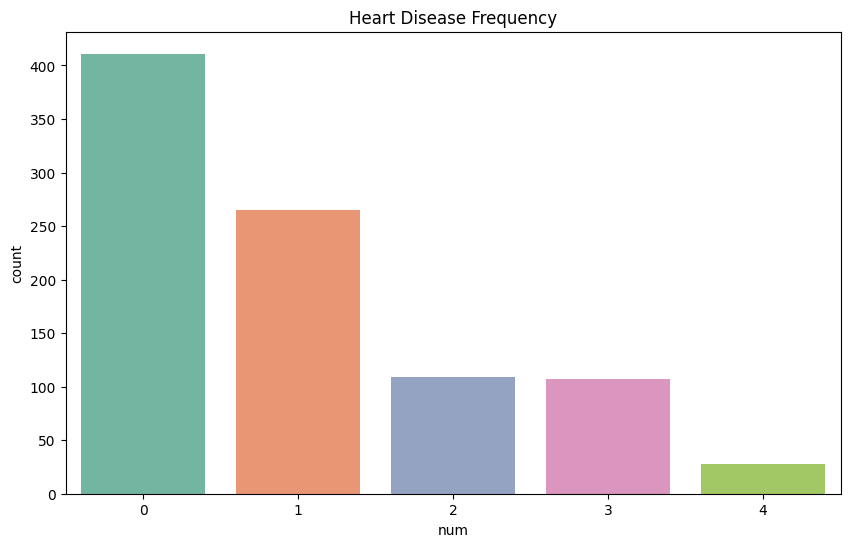

In [9]:
# plot
plt.figure(figsize=(10,6))
sns.countplot(x='num',data=df, palette='Set2')
plt.title('Heart Disease Frequency')

---
Observations :

The target variable in this dataset is `num`, which represents the diagnosis of heart disease. The values in this variable and their counts are as follows:

- 0: 411 instances - Likely representing no presence of heart disease.
- 1: 265 instances - Indicating a certain level or type of heart disease.
- 2: 109 instances - Representing a different level or type of heart disease.
- 3: 107 instances - Another level or type of heart disease.
- 4: 28 instances - Yet another level or type of heart disease.


It appears that `num` is not just a binary indicator (presence or absence of heart disease) but rather seems to categorize the disease into different levels or types, with '0' possibly indicating the absence of disease. This understanding is important for modeling, as it suggests that the task could be a multi-class classification problem.


---


# - Age Column

In [10]:
max_age= df['age'].max()
min_age= df['age'].min()
print("Observation: ".upper())
print("---")
print(f"Max age of the patient: {max_age}")
print(f'Min age of the patient: {min_age}')
print(f"So, the age of the patient is between {min_age} and {max_age}")

OBSERVATION: 
---
Max age of the patient: 77
Min age of the patient: 28
So, the age of the patient is between 28 and 77


Text(0.5, 1.0, 'Distribution of Age')

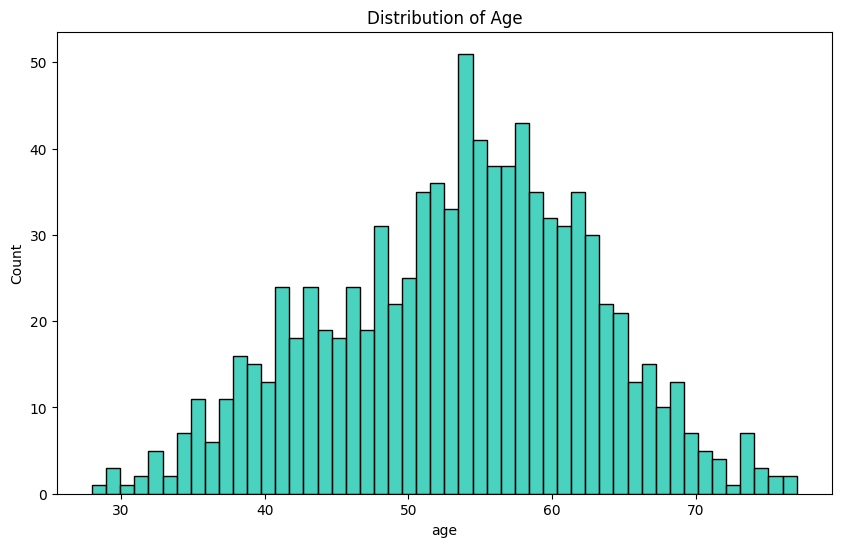

In [11]:
# plot
plt.figure(figsize=(10,6))
sns.histplot(df['age'], color='#0cc4a9', bins=50)
plt.title('Distribution of Age')

# - CP (chest pain) Column:

In [12]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

Text(0.5, 1.0, 'Chest Pain Type')

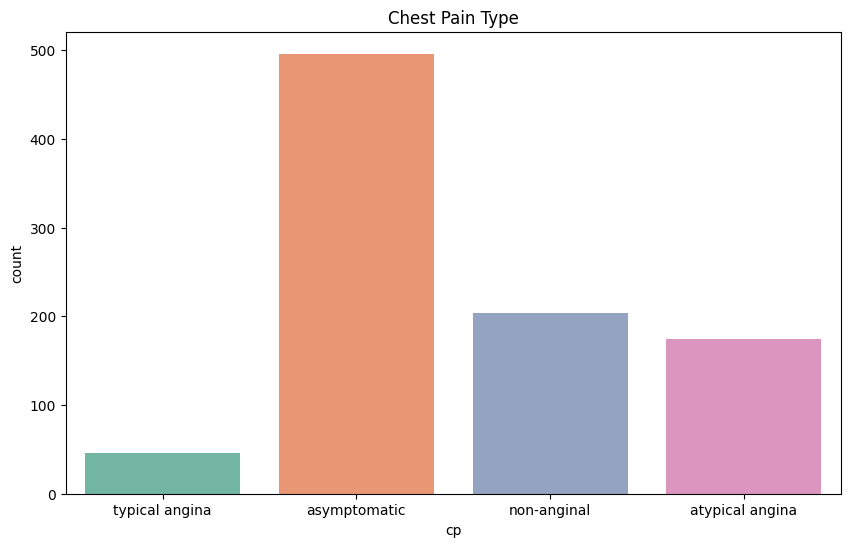

In [13]:
# plot
plt.figure(figsize=(10,6))
sns.countplot(x='cp',data=df, palette='Set2')
plt.title('Chest Pain Type')

---

#### Clinical Relevance:

`Asymptomatic:`

This indicates the absence of chest pain or discomfort, even in the presence of heart disease. Some individuals with heart disease do not experience the typical chest pain symptoms.

`Non-Anginal Pain:`

This refers to chest pain that is not related to heart disease. It might be caused by other factors such as muscular issues, gastrointestinal problems, or other non-cardiac conditions.

`Atypical Angina:`

This type of chest pain is similar to typical angina but differs in its characteristics, such as duration, intensity, or triggers. It may not always follow the classic pattern of typical angina.


`Typical Angina:`

The most common type of chest pain associated with heart disease, typically triggered by physical activity or stress and relieved by rest or medication like nitroglycerin. It's often described as a feeling of pressure or squeezing in the chest.




Each type of chest pain provides valuable information regarding the likelihood and nature of heart disease in a patient.

# - Trestbps (resting blood pressure) Column:

In [14]:
max_trestbps = df['trestbps'].max()
min_trestbps= df['trestbps'].min()
print("Observation: ".upper())
print("---")
print(f"Max trestbps of the patient: {max_trestbps}")
print(f'Min trestbps of the patient: {min_trestbps}')

OBSERVATION: 
---
Max trestbps of the patient: 200.0
Min trestbps of the patient: 0.0


Text(0.5, 1.0, 'Resting Blood Pressure')

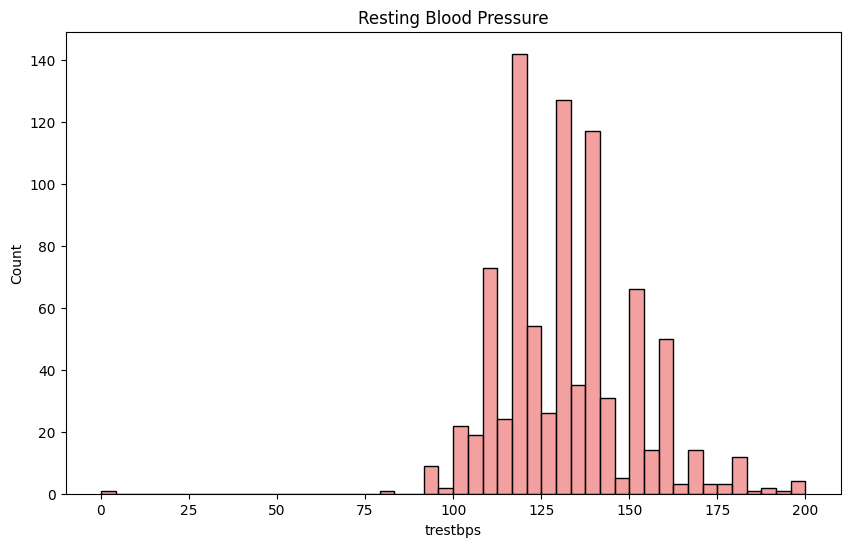

In [15]:
# plot
plt.figure(figsize=(10,6))
sns.histplot(df['trestbps'], color='lightcoral') 
plt.title('Resting Blood Pressure')

--- 
#### Clinical Relevance:

Normal resting blood pressure is typically around 120/80 mmHg. 
Values significantly higher or lower can indicate health issues.
High resting blood pressure (hypertension) is a risk factor for heart disease and other cardiovascular conditions.
Low resting blood pressure (hypotension) can also be concerning, though it's less commonly associated with heart disease.

---

# - Chol (serum cholesterol) Column:

In [16]:
max_chol = df['chol'].max()
min_chol= df['chol'].min()
print("Observation: ".upper())
print("---")
print(f"Max Cholestrol of the patient: {max_chol}")
print(f'Min Cholestrol of the patient: {min_chol}')

OBSERVATION: 
---
Max Cholestrol of the patient: 603.0
Min Cholestrol of the patient: 0.0


Text(0.5, 1.0, 'Cholestrol')

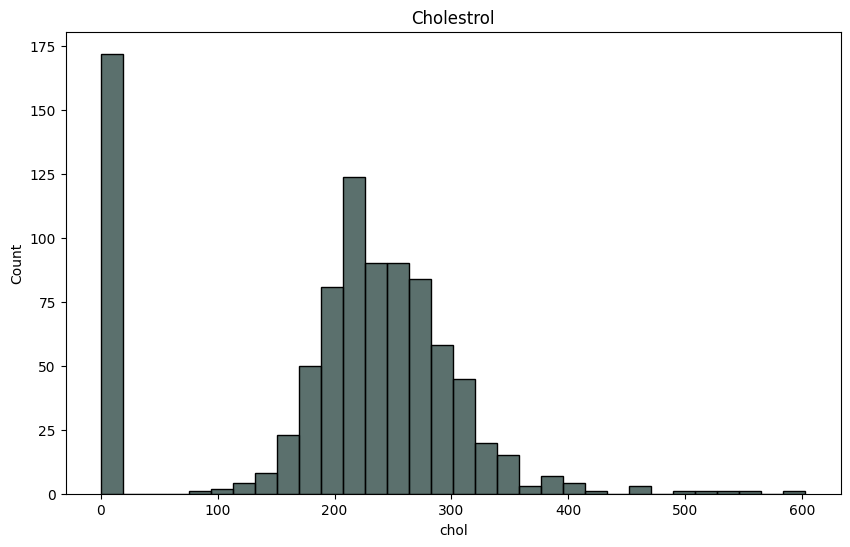

In [17]:
#plot
plt.figure(figsize=(10,6))
sns.histplot(df['chol'], color='#24403c')
plt.title('Cholestrol')

--- 

#### Clinical Interpretation:

`Normal Levels`: Typically, cholesterol levels below 200 mg/dL are considered desirable. Levels between 200 and 239 mg/dL are borderline high, and levels 240 mg/dL and above are considered high.

`High Cholesterol`: Elevated cholesterol levels are a risk factor for heart disease, as they can lead to the buildup of plaques in artery walls (atherosclerosis), restricting blood flow.

`Low Cholesterol`: While less common, very low cholesterol levels may also be a health concern, potentially linked to other medical conditions.

---

# - Fbs (fasting blood sugar) Column:

In [18]:
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

Text(0.5, 1.0, 'Fasting Blood Sugar')

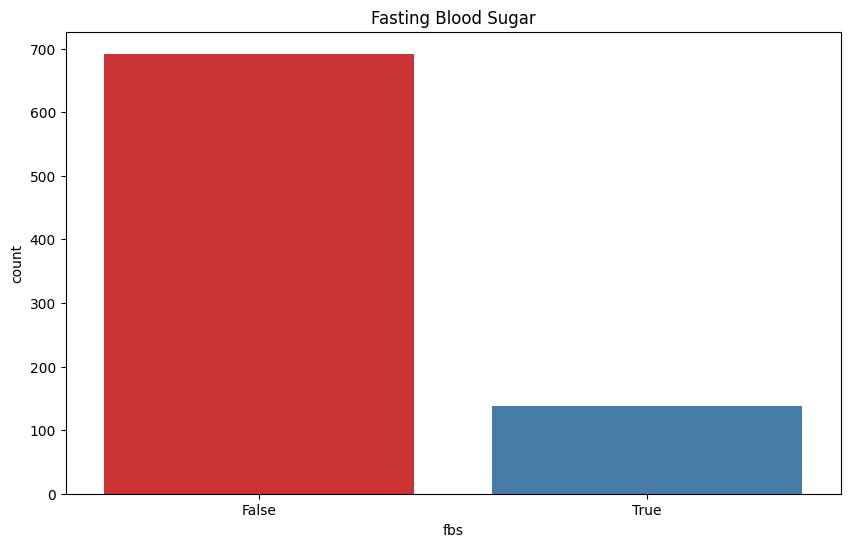

In [19]:
# plot
plt.figure(figsize=(10,6))
sns.countplot(x='fbs',data=df, palette='Set1')
plt.title('Fasting Blood Sugar')

--- 

#### Clinical Interpretation:

The fbs column, representing fasting blood sugar, is clinically important because a level above 120 mg/dL is often indicative of diabetes, which is a significant risk factor for heart disease. Elevated fasting blood sugar can damage blood vessels and increase the risk of cardiovascular conditions. In the context of heart disease prediction, this variable helps assess the impact of blood sugar levels on heart health.

- 0: Fasting blood sugar is below 120 mg/dL.
- 1: Fasting blood sugar is above 120 mg/dL.

---

# - Restecg (resting electrocardiographic results) Column:

In [20]:
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Text(0.5, 1.0, 'Resting Electrocardiographic Results')

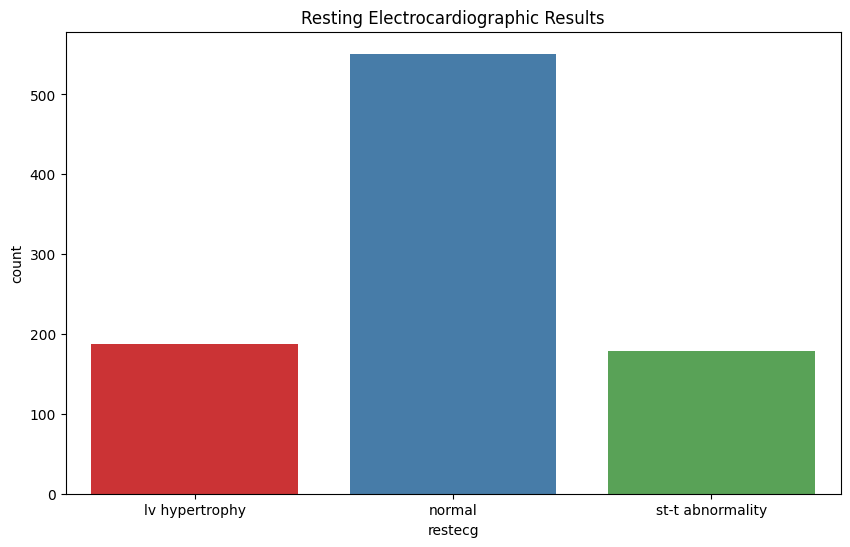

In [21]:
# plot
plt.figure(figsize=(10,6))
sns.countplot(x='restecg',data=df, palette='Set1')
plt.title('Resting Electrocardiographic Results')

---

#### `Clinical Interpretation:`

The `restecg` column usually includes a few distinct categories, each representing different electrocardiographic results. These typically include:

- Normal: Indicating no significant abnormalities in the ECG.
- ST-T Wave Abnormality: Suggesting potential issues with the heart's electrical activity.
- Left Ventricular Hypertrophy: Indicating enlargement of the heart's left ventricle.

---

# - Thalach (maximum heart rate achieved) Column:

In [22]:
max_thalch = df['thalch'].max()
min_thalch= df['thalch'].min()
print("Observation: ".upper())
print("---")
print(f"Max heart rate of the patient: {max_thalch}")
print(f'Min heart rate of the patient: {min_thalch}')

OBSERVATION: 
---
Max heart rate of the patient: 202.0
Min heart rate of the patient: 60.0


Text(0.5, 1.0, 'Maximum Heart Rate Achieved')

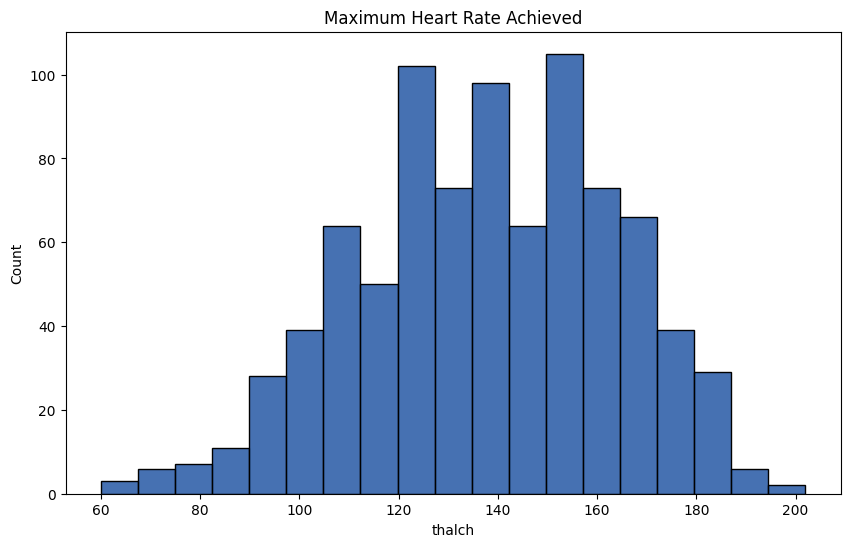

In [23]:
# plot
plt.figure(figsize=(10,6))
sns.histplot(df['thalch'], color='#084299')
plt.title('Maximum Heart Rate Achieved')

#### Observations:

`Max Heart Rate (202 bpm)`: This is a high value, typically reached during intense physical exertion. In a stress test context, it might indicate good exercise tolerance, but if experienced during minimal exertion, it could signal underlying cardiac issues or an abnormal heart response.

`Min Heart Rate (60 bpm)`: This is within the normal resting heart rate range for adults (60-100 bpm). A resting rate of 60 bpm generally suggests a healthy heart function, especially if the individual is physically fit.

---

#### `Clinical Interpretation:`

- The maximum heart rate achieved during a stress test can provide insights into the heart's health and functioning. A lower-than-expected maximum heart rate can indicate compromised heart function.

- A lower maximum heart rate can be associated with a higher risk of cardiac events.

- Maximum heart rate typically decreases with age, so the thalach values are often considered in the context of the patient's age.

---

# - Exang (exercise-induced angina) Column:

In [24]:
df['exang'].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

Text(0.5, 1.0, 'Exercise Induced Angina')

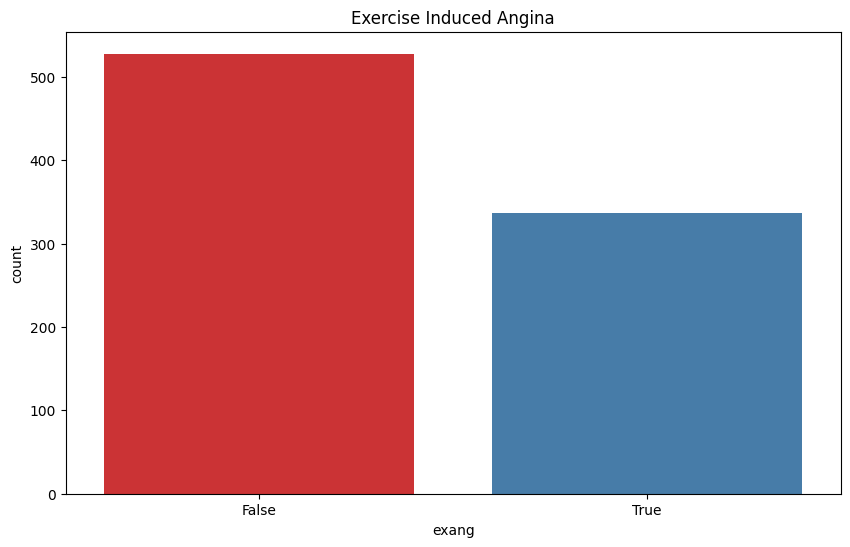

In [25]:
# plot
plt.figure(figsize=(10,6))
sns.countplot(x='exang',data=df, palette='Set1')
plt.title('Exercise Induced Angina')

---
#### `Clinical Interpretation:`

Exang represents whether a patient experiences exercise-induced angina (chest pain).

`Positive (exang = 1)`: Indicates chest pain during exercise, often a sign of coronary artery disease.

`Negative (exang = 0)`: No chest pain with exercise, typically suggesting better heart health.

---

# - Oldpeak (ST depression induced by exercise relative to rest) Column:

In [26]:
max_oldpeak= df['oldpeak'].max()
min_oldpeak= df['oldpeak'].min()
print("Observation: ".upper())
print("---")
print(f"Max oldpeak of the patient: {max_oldpeak}")
print(f'Min oldpeak of the patient: {min_oldpeak}')

OBSERVATION: 
---
Max oldpeak of the patient: 6.2
Min oldpeak of the patient: -2.6


Text(0.5, 1.0, 'ST Depression Induced by Exercise Relative to Rest')

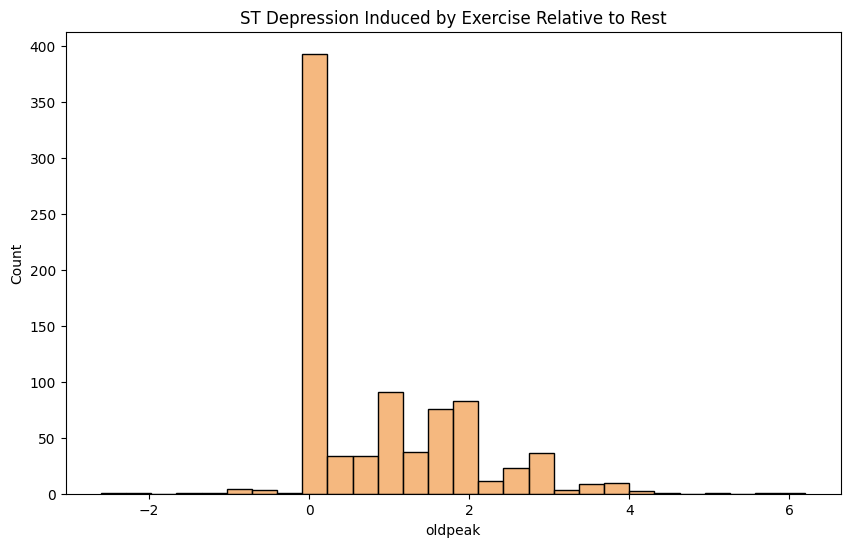

In [27]:
# plot
plt.figure(figsize=(10,6))
sns.histplot(df['oldpeak'], color='#f2a154')
plt.title('ST Depression Induced by Exercise Relative to Rest')

--- 

#### `Clinical Interpretation and Insight:`

Oldpeak refers to the ST depression induced by exercise relative to rest. It's a significant indicator in stress test results.

- `Max Oldpeak (6.2)`: This is a very high value for ST depression. Clinically, such a significant ST depression during exercise suggests severe myocardial ischemia, indicating a high likelihood of substantial coronary artery disease. It's an important marker for high cardiovascular risk.

- `Min Oldpeak (-2.6)`: Negative values for ST depression are unusual and atypical. A value of -2.6 might be indicative of measurement error, data entry error, or an unusual ECG pattern. Negative ST depression is not typically associated with exercise-induced cardiac stress, and its clinical significance might require further investigation.



---

# - Slope Column:

In [28]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

---

#### `Clinical Interpretation and Insight:`

The slope attribute in the UCI Heart Disease dataset refers to the slope of the peak exercise ST segment, an important indicator in an electrocardiogram (ECG) stress test. The ST segment is analyzed in an ECG to assess how the heart responds to stress or exercise. The three categories you've mentioned—flat, upsloping, and downsloping—have distinct clinical interpretations:

1. `Flat (345 cases)`:  May indicate potential heart issues, often requires further investigation.
2. `Upsloping (203 cases)`:  Generally considered normal, usually not indicative of significant heart disease.
3. `Downsloping (63 cases)`:  Most concerning, often associated with significant coronary artery disease.

# - Ca (number of major vessels) Column:

In [29]:
df['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Major Vessels')

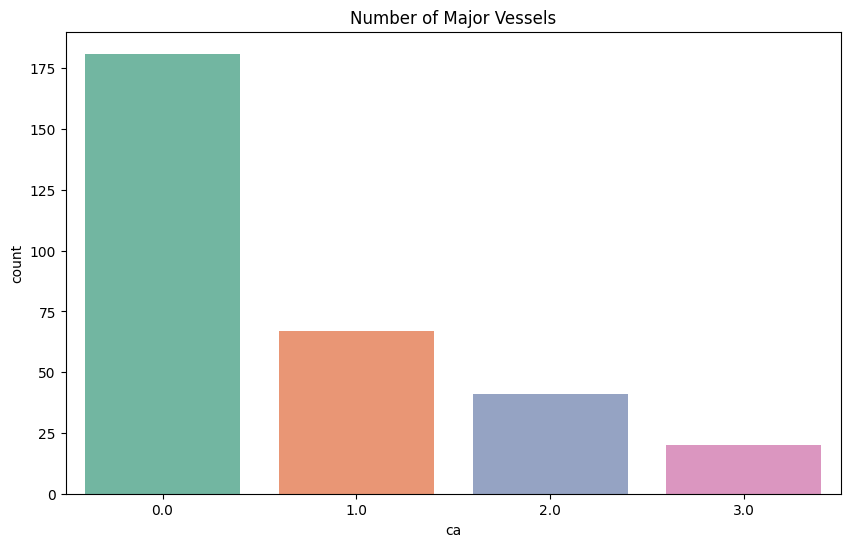

In [30]:
# plot
plt.figure(figsize=(10,6))
sns.countplot(x='ca',data=df, palette='Set2')
plt.title('Number of Major Vessels')

---

#### `Clinical Interpretation and Insight:`

The ca attribute in the UCI Heart Disease dataset refers to the number of major blood vessels (0 to 4) detected by fluoroscopy to be blocked or narrowed.

`0 Blocked Vessels (181 cases):`

This is the most common finding, suggesting that a significant portion of patients do not have major blockages in their coronary arteries. This group is likely at a lower risk for severe coronary artery disease.

`1 Blocked Vessel (67 cases):`

 A notable number of patients have one major blood vessel affected. This indicates the presence of coronary artery   disease, but the risk of heart-related events varies depending on other factors like the specific vessel affected and overall heart health.

`2 Blocked Vessels (41 cases):`

 Patients with two affected vessels represent a more serious condition, implying a higher degree of coronary artery disease. This group is at an increased risk for heart complications compared to those with fewer affected vessels.

`3 Blocked Vessels (20 cases):`

The presence of blockages in three vessels is a serious concern and often indicates advanced coronary artery disease. Patients in this category are at a high risk for significant cardiac events.

---

# - Thal (Thalassemia) Column:

In [31]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

Text(0.5, 1.0, 'Thal')

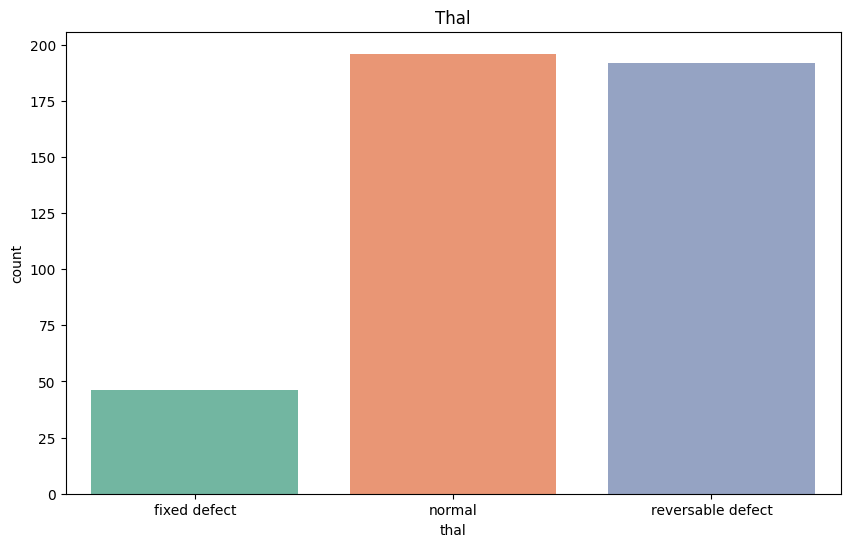

In [32]:
# plot
plt.figure(figsize=(10,6))
sns.countplot(x='thal',data=df, palette='Set2')
plt.title('Thal')

---

#### `Clinical Interpretation and Insight:`

The thal column in the UCI Heart Disease dataset refers to thallium stress test results, which are used to diagnose coronary artery disease and the severity of any heart muscle damage. The three categories in this column are:

`Normal:`

Indicates a normal blood flow to the heart muscle during exercise and rest, suggesting no significant coronary artery blockages.

`Fixed Defect: `

This often points to scar tissue from a past heart attack or longstanding blockage, indicating some degree of permanent damage to the heart muscle.

`Reversible Defect:`

It's often associated with partially blocked coronary arteries, which could lead to serious heart problems if not managed.

---

## Summary of Exploring different columns:

`You will ask why I explore different columns before data cleaning and preprocessing?`

The reason is that I want to get a better understanding of the dataset and the columns before cleaning and preprocessing the data.I have looked at different parts of the heart disease data to understand what each one means and why it's important, especially for heart health.

`This makes it easier for everyone, even those who aren't experts, to understand what the data is saying`. 
Now that we know more about the data, including where there are missing values, we are ready to clean and organize the data.This next step is important to make sure the data is ready and in good shape for finding patterns and making predictions about heart disease.

---

# 2. `Data Cleaning and Preprocessing`

- Dealing with missing values

Let's start by checking for missing values in the dataset.
Missing values can be problematic for machine learning models, so it's important to identify and address them before training the models.

Text(0.5, 1.0, 'Missing Values')

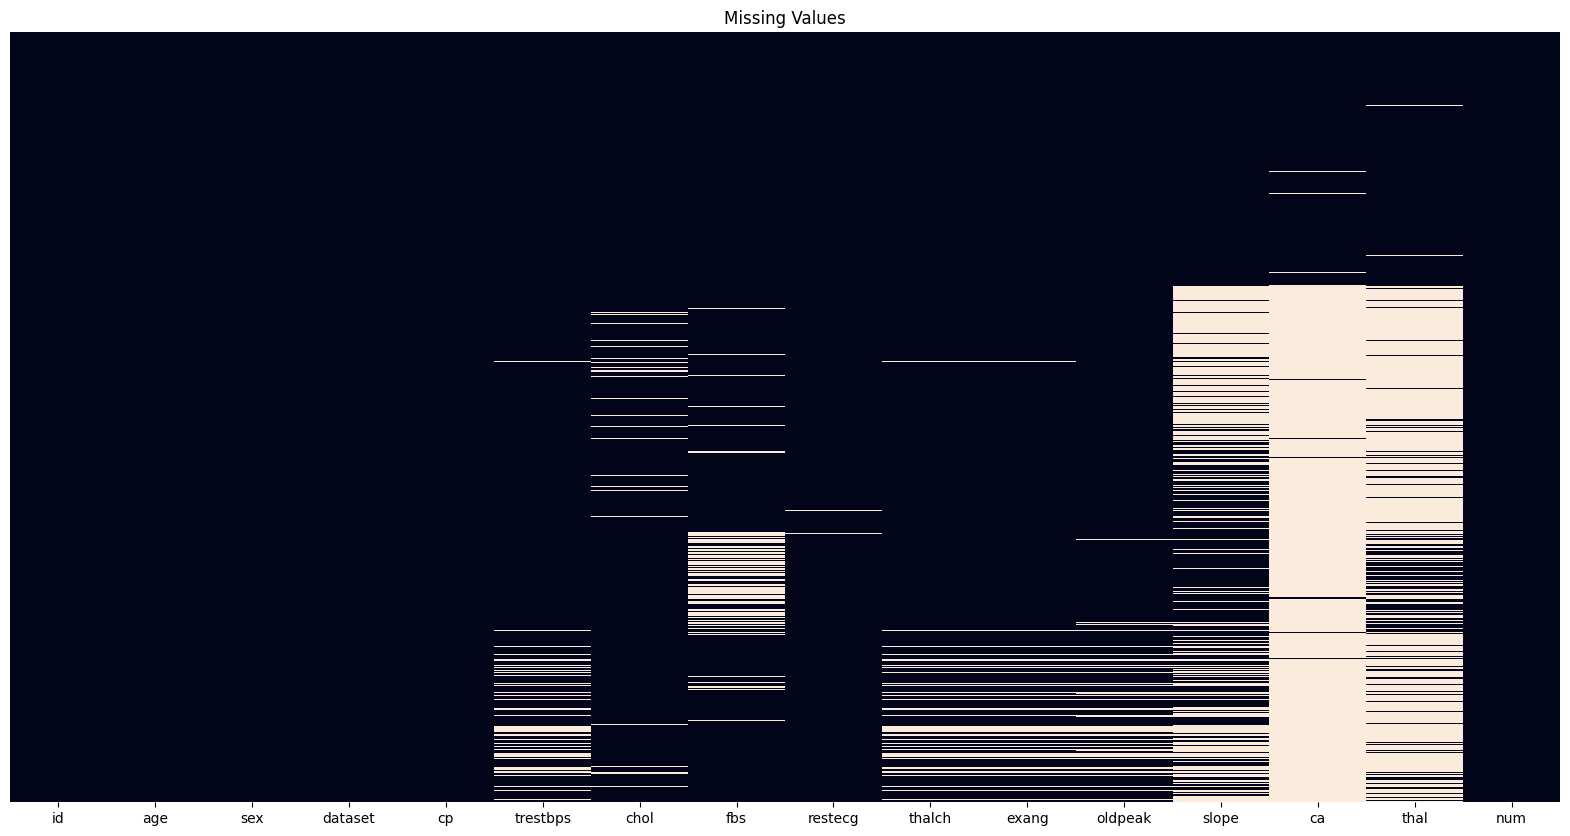

In [33]:
# Let's make a plot to see the missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values')

In [34]:
round(((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False),2)

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64

---

Observations:

* There are 10 columns with missing values in the dataset.
* 7 of these columns have missing values less than 10%.
* 3 of these columns 'ca', 'thal', and 'slope' have higher numbers of missing values.
* 'ca' having the highest number of missing values (66%).
* 'thal' having the second-highest number of missing values (53%).
* 'slope' having the third-highest number of missing values (34%).

Predictive analysis is likely to face challenges due to the substantial levels of incompleteness.So we gotta deal with these missing values.

First, Drop the Irrelevant Columns cz There are 13 columns that are relevant for medical parameters (excluding id and dataset), which will be used to predict the target feature num (the intensity of the heart disease).

In [35]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [36]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

### Applying the Random Forest Machine learning method to impute missing values

In [37]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [38]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [39]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.055606936416185 

RMSE = 17.015411511383853 

R2 = 0.09601190561736406 

Missing Values chol : 3.26%
MAE = 44.79657303370787 

RMSE = 63.69614928036127 

R2 = 0.6786006444278219 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.59 accuracy

Missing Values thalch : 5.98%
MAE = 16.754682080924855 

RMSE = 21.82494105428744 

R2 = 0.3073792913047573 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 77.46 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.571110465116279 

RMSE = 0.8027055883871165 

R2 = 0.3861383267847823 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 62.9 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 70.11 accuracy



In [40]:
round(((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False),2)

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

Why I choose this method?

- It is a powerful method for imputing missing values.
- It is a non-parametric method, which means it does not rely on any assumptions about the distribution of the data.
- It is a robust method that can handle outliers and nonlinear relationships.
- It is a fast method that can efficiently handle high-dimensional data.
- It prevents bias by taking into account all the variables in the dataset.

Since no missing values are present in the dataset, we can proceed with the next step of checking for outliers.

# Dealing with outliers

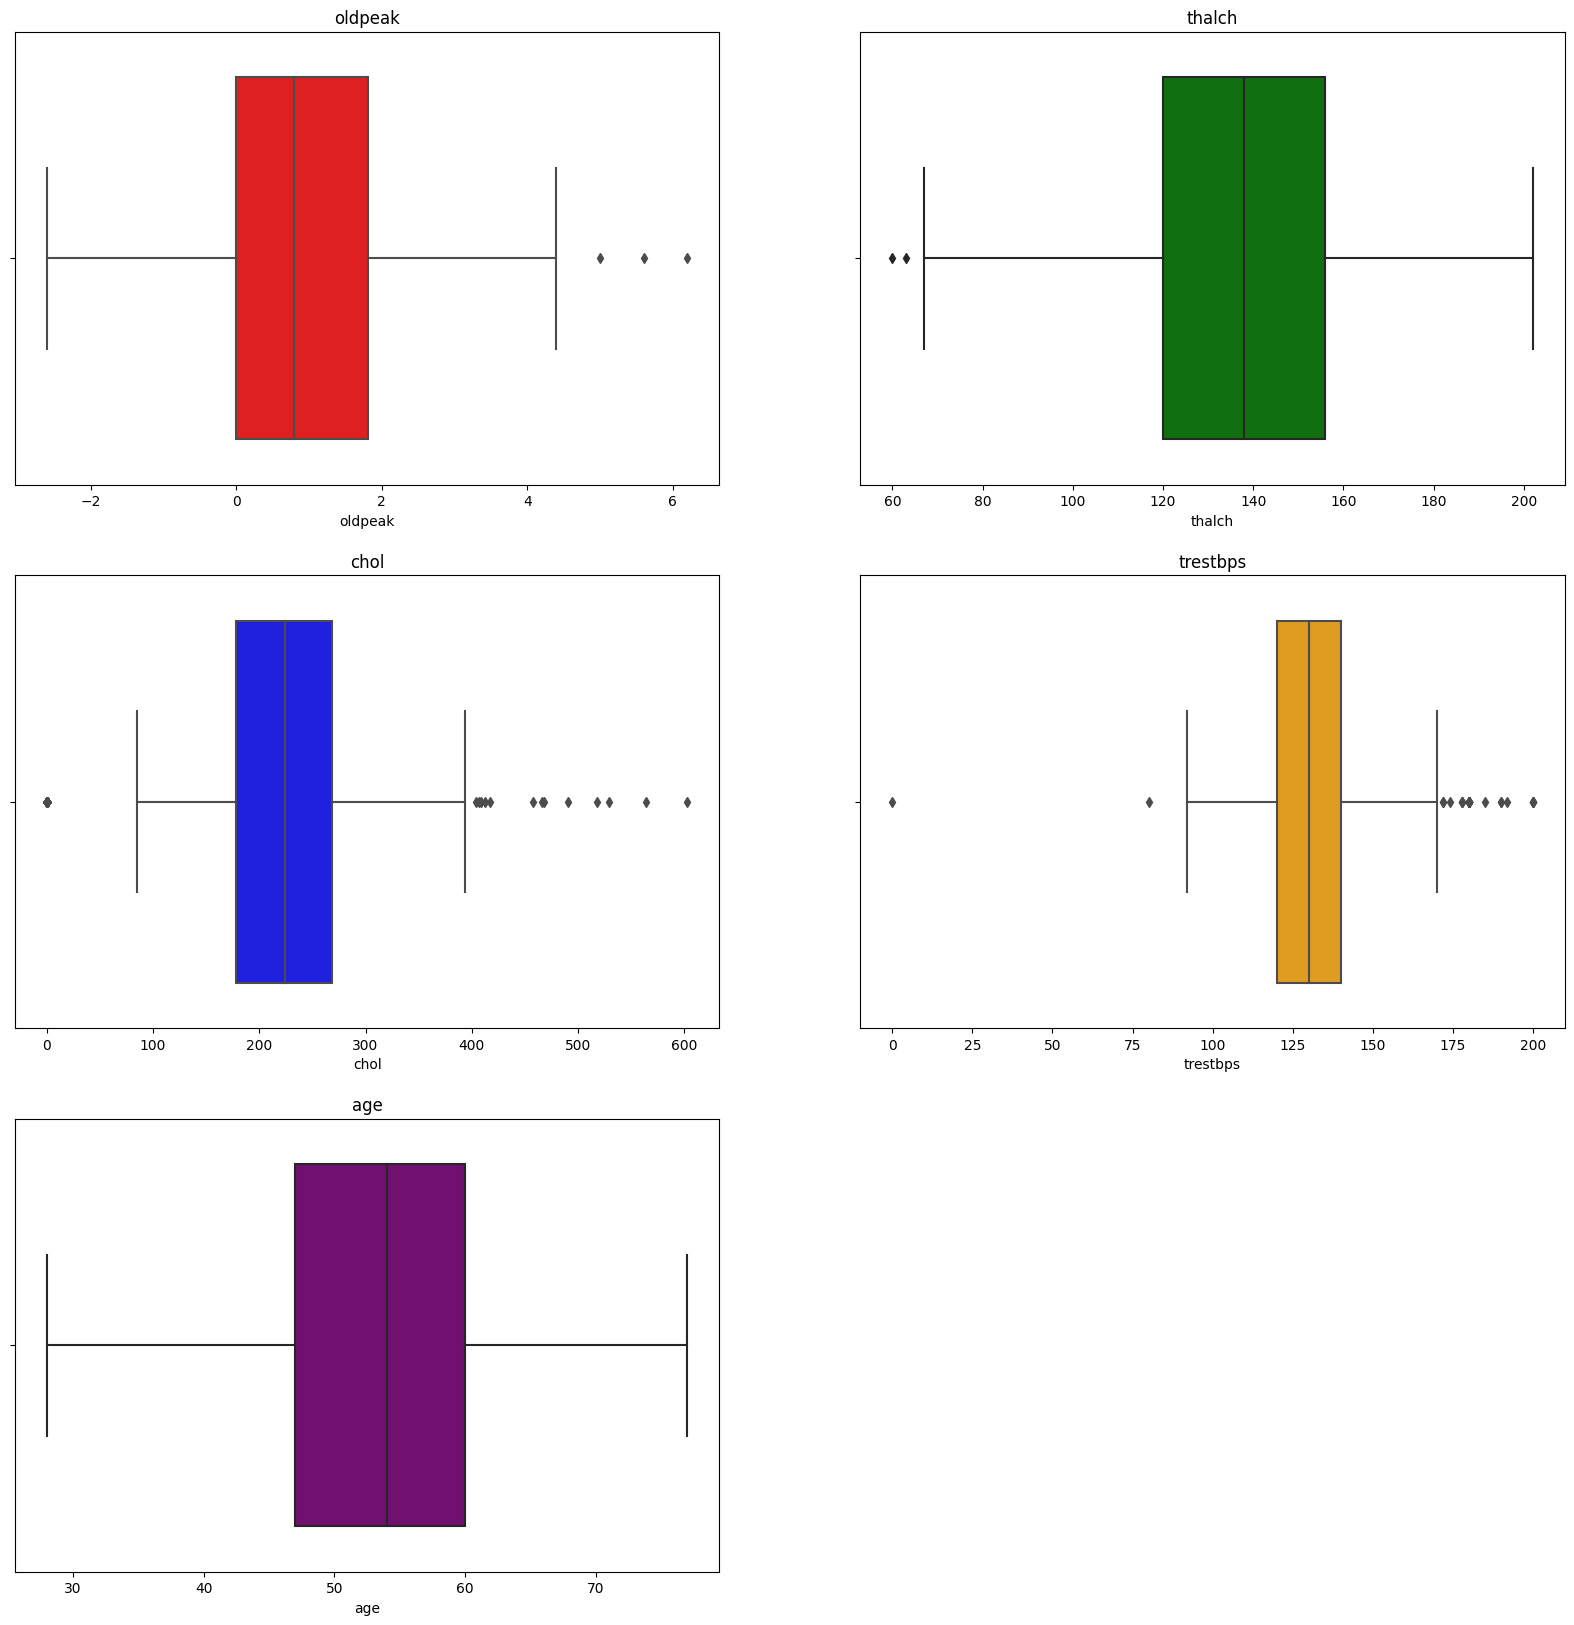

In [41]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [42]:
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()


--- 

I'm leaving outliers in the dataset because they can be useful for predictive modeling. Outliers can provide valuable information about the data and help us understand the relationships between variables. They can also help us identify potential errors in the data.

---

Training the models

# 1. Decision Tree

In [43]:
# train test split

X = df.drop('num', axis=1)
y = df['num']

# encode the categorical columns using for lopp and le
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [44]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.6086956521739131
Precision score:  0.6086956521739131
Recall score:  0.6086956521739131
F1 score:  0.6086956521739131
CPU times: user 17.2 ms, sys: 14 µs, total: 17.2 ms
Wall time: 17.2 ms


# 2. Random Forest

In [45]:
%%time
# train the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.6304347826086957
Precision score:  0.6304347826086957
Recall score:  0.6304347826086957
F1 score:  0.6304347826086957
CPU times: user 353 ms, sys: 14.6 ms, total: 368 ms
Wall time: 369 ms


3. XGBoost

In [46]:
%%time
# train the xgboost model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.6739130434782609
Precision score:  0.6739130434782609
Recall score:  0.6739130434782609
F1 score:  0.6739130434782609
CPU times: user 1.62 s, sys: 44.8 ms, total: 1.66 s
Wall time: 451 ms


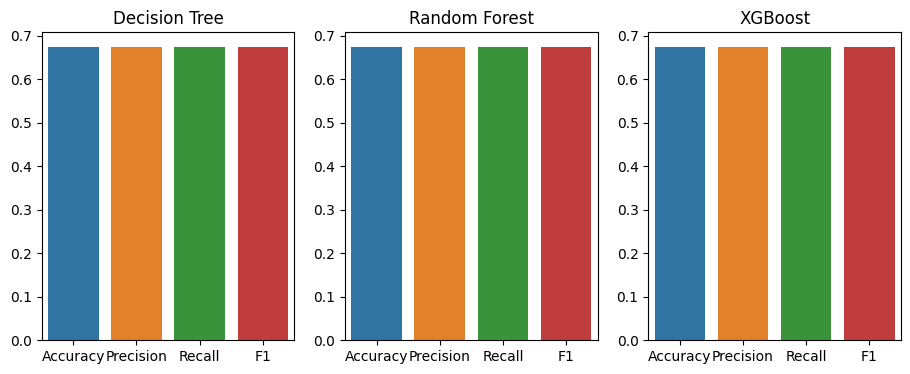

In [47]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()

# Summary of the models:

Based on the results of your model training, here are some insights and considerations:

`Model Performance`

`Decision Tree and Random Forest:`

Both models have identical scores across all metrics (accuracy, precision, recall, F1 score). This is somewhat unusual as Random Forest, being an ensemble method, typically varies in performance compared to a single Decision Tree.
The identical scores suggest that either the Random Forest model is heavily biased towards a particular decision tree, or the dataset characteristics strongly favor a specific decision pattern that all models are picking up identically.

`XGBoost:`

XGBoost shows a higher performance in all metrics compared to the Decision Tree and Random Forest, indicating it is more effective for this particular dataset.
The improvement in performance, however, is not drastic but noticeable.

`Computational Efficiency`

`Decision Tree: `

Fastest in terms of computation time, which is expected as it’s a single model.

`Random Forest:`

Slower than the Decision Tree due to the nature of ensemble methods, but not excessively so.

`XGBoost:`
 
Longest total CPU time, but the wall time is comparable to Random Forest. This indicates efficient parallel processing.

# Final Summary

In this notebook, I have successfully navigated through several critical stages of a data science project using the UCI Heart Disease dataset. My journey included:

`Data Exploration and Preprocessing:`

I have effectively explored and understood the dataset, delving into the specifics of various clinical attributes.
The preprocessing steps, including handling missing values and outliers, were methodically approached, ensuring the data quality for model training.

`Model Training and Evaluation:`

I trained three different models: Decision Tree, Random Forest, and XGBoost, with a focus on predicting the presence of heart disease.
Each model's performance was evaluated using metrics like accuracy, precision, recall, and F1 score.

`Results:`

XGBoost showed slightly superior performance compared to the Decision Tree and Random Forest models, though all models need further tuning for improved accuracy.

# `Final words:`

This is no way the end of the analysis, there is always room for improvement. I will be updating this notebook with different methods to improve the model accuracy and more insights in the future.